## [SNLI(The Standford Natural Language Inference)](https://torchtext.readthedocs.io/en/latest/datasets.html#snli)

In [ ]:
!pip install torchtext

In [ ]:
import os
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchtext import data, datasets
import random

os.environ['CUDA_LAUNCH_BLOCKING'] = "1" # CUDA error: device-side assert triggered

In [ ]:
USE_CUDA = torch.cuda.is_available()
DEVICE = torch.device("cuda" if USE_CUDA else "cpu")

In [ ]:
TEXT = data.Field(sequential=True, batch_first=True, lower=True)
LABEL = data.Field(sequential=False, batch_first=True)
#PARSE = data.Field(sequential=False, batch_first=True)

In [ ]:
#train_data, val_data, test_data = datasets.SNLI.splits(TEXT, LABEL, PARSE)
train_data, val_data, test_data = datasets.SNLI.splits(TEXT, LABEL) # TEXT = premise, pythothesis, LABEL = label

In [ ]:
print(len(train_data), len(val_data), len(test_data))

549367 9842 9824


In [ ]:
n = 300

In [ ]:
print(train_data[n])

In [ ]:
print(train_data[n].__dict__)

{'premise': ['a', 'foreign', 'family', 'is', 'walking', 'along', 'a', 'dirt', 'path', 'next', 'to', 'the', 'water.'], 'hypothesis': ['a', 'family', 'walks', 'along', 'a', 'dirt', 'path.'], 'label': 'entailment'}


In [ ]:
print(type(train_data[n].premise), len(train_data[n].premise))
print(type(train_data[n].hypothesis), len(train_data[n].hypothesis))
print(type(train_data[n].label))
print(type(train_data[n+100].premise), len(train_data[n+100].premise))
print(type(train_data[n+100].hypothesis), len(train_data[n+100].hypothesis))
print(type(train_data[n+100].label))

<class 'list'> 13
<class 'list'> 7
<class 'str'>
<class 'list'> 10
<class 'list'> 7
<class 'str'>


In [ ]:
print(" ".join(train_data[n].premise))
print(" ".join(train_data[n].hypothesis))
print('label: {}'.format(train_data[n].label))

a foreign family is walking along a dirt path next to the water.
a family walks along a dirt path.
label: entailment


In [ ]:
print(" ".join(test_data[n].premise))
print(" ".join(test_data[n].hypothesis))
print('label: {}'.format(train_data[n].label))

a person in a red shirt is mowing the grass with a green riding mower.
a person in red is moving grass on a john deer motor.
label: entailment


In [ ]:
TEXT.build_vocab(train_data, min_freq=5) # 단어 집합 생성
LABEL.build_vocab(train_data)

In [ ]:
print(type(TEXT.vocab))

<class 'torchtext.vocab.Vocab'>


In [ ]:
print(len(TEXT.vocab), len(LABEL.vocab))

24415 4


In [ ]:
print(type(TEXT.vocab.stoi))

<class 'collections.defaultdict'>


In [ ]:
print(TEXT.vocab.stoi) # 단어 -> 숫자 매핑 

defaultdict(<function _default_unk_index at 0x7fd801d60ae8>, {'<unk>': 0, '<pad>': 1, 'a': 2, 'the': 3, 'in': 4, 'is': 5, 'man': 6, 'on': 7, 'and': 8, 'are': 9, 'of': 10, 'with': 11, 'woman': 12, 'two': 13, 'people': 14, 'to': 15, 'at': 16, 'wearing': 17, 'an': 18, 'his': 19, 'young': 20, 'men': 21, 'playing': 22, 'girl': 23, 'boy': 24, 'while': 25, 'white': 26, 'black': 27, 'sitting': 28, 'dog': 29, 'shirt': 30, 'blue': 31, 'standing': 32, 'group': 33, 'her': 34, 'for': 35, 'red': 36, 'walking': 37, 'down': 38, 'person': 39, 'front': 40, 'holding': 41, 'women': 42, 'three': 43, 'one': 44, 'there': 45, 'child': 46, 'by': 47, 'their': 48, 'looking': 49, 'as': 50, 'up': 51, 'children': 52, 'some': 53, 'from': 54, 'little': 55, 'green': 56, 'outside': 57, 'through': 58, 'large': 59, 'has': 60, 'riding': 61, 'street': 62, 'yellow': 63, 'next': 64, 'running': 65, 'into': 66, 'brown': 67, 'near': 68, 'out': 69, 'street.': 70, 'other': 71, 'dressed': 72, 'over': 73, 'small': 74, 'outside.': 7

In [ ]:
print(type(TEXT.vocab.itos))

<class 'list'>


In [ ]:
print(TEXT.vocab.itos) # 0부터 인덱스된 단어 목록

['<unk>', '<pad>', 'a', 'the', 'in', 'is', 'man', 'on', 'and', 'are', 'of', 'with', 'woman', 'two', 'people', 'to', 'at', 'wearing', 'an', 'his', 'young', 'men', 'playing', 'girl', 'boy', 'while', 'white', 'black', 'sitting', 'dog', 'shirt', 'blue', 'standing', 'group', 'her', 'for', 'red', 'walking', 'down', 'person', 'front', 'holding', 'women', 'three', 'one', 'there', 'child', 'by', 'their', 'looking', 'as', 'up', 'children', 'some', 'from', 'little', 'green', 'outside', 'through', 'large', 'has', 'riding', 'street', 'yellow', 'next', 'running', 'into', 'brown', 'near', 'out', 'street.', 'other', 'dressed', 'over', 'small', 'outside.', 'girls', 'another', 'dogs', 'hat', 'around', 'water.', 'water', 'stands', 'sits', 'that', 'jumping', 'behind', 'orange', 'working', 'looks', 'jacket', 'boys', 'lady', 'pink', 'ball', 'crowd', 'plays', 'four', 'player', 'watching', 'play', 'couple', 'taking', 'bike', 'off', 'old', 'asian', 'kids', 'he', 'top', 'they', 'talking', 'walks', 'eating', 'ol

In [ ]:
print(type(TEXT.vocab.freqs))

<class 'collections.Counter'>


In [ ]:
print(len(TEXT.vocab.freqs))

56218


In [ ]:
w = list(TEXT.vocab.freqs)

In [ ]:
print(w[:100])

['a', 'person', 'on', 'horse', 'jumps', 'over', 'broken', 'down', 'airplane.', 'children', 'smiling', 'and', 'waving', 'at', 'camera', 'boy', 'is', 'jumping', 'skateboard', 'in', 'the', 'middle', 'of', 'red', 'bridge.', 'an', 'older', 'man', 'sits', 'with', 'his', 'orange', 'juice', 'small', 'table', 'coffee', 'shop', 'while', 'employees', 'bright', 'colored', 'shirts', 'smile', 'background.', 'two', 'blond', 'women', 'are', 'hugging', 'one', 'another.', 'few', 'people', 'restaurant', 'setting,', 'them', 'drinking', 'juice.', 'restaurant.', 'blond-hair,', 'brown', 'shirt', 'out', 'public', 'water', 'fountain.', 'who', 'just', 'had', 'lunch', 'saying', 'goodbye.', 'women,', 'holding', 'food', 'carryout', 'containers,', 'hug.', 'little', 'league', 'team', 'tries', 'to', 'catch', 'runner', 'sliding', 'into', 'base', 'afternoon', 'game.', 'school', 'having', 'special', 'event', 'order', 'show', 'american', 'culture', 'how', 'other']


In [ ]:
print(TEXT.vocab.freqs['person'])

34801


In [ ]:
from torchtext.data import Iterator

batch_size  = 4
train_loader = Iterator(dataset=train_data, batch_size = batch_size)
test_loader = Iterator(dataset=test_data, batch_size = batch_size)

In [ ]:
print('훈련 데이터의 미니 배치 수 : {}'.format(len(train_loader)))
print('테스트 데이터의 미니 배치 수 : {}'.format(len(test_loader)))

훈련 데이터의 미니 배치 수 : 137342
테스트 데이터의 미니 배치 수 : 2456


In [ ]:
embed_dim = 128
n_vocab = len(TEXT.vocab)
embed = nn.Embedding(n_vocab, embed_dim)

In [ ]:
train_batch = next(iter(train_loader)) # 첫번째 미니배치
print(train_batch.premise.shape)
print(train_batch.premise)

torch.Size([4, 28])
tensor([[    2,    55,    24,     4,     2,    63,    30,    37,     7,  5098,
             1,     1,     1,     1,     1,     1,     1,     1,     1,     1,
             1,     1,     1,     1,     1,     1,     1,     1],
        [    3,  4309,  8838,    11,     3,   564,   390,     5,    65,  1968,
            10,     3, 14999,     8,     3, 11188,     1,     1,     1,     1,
             1,     1,     1,     1,     1,     1,     1,     1],
        [    2,    23,    17,     2,    67,    91,     8,   155,     5,    28,
             7,     2,   190,   212,    16,     3,   611,    10,     2,  5185,
            45,     9,   116,    74,  2946,     4,     3,   119],
        [    2,  3208,   452,    10,    14,     9,     7,  6560,     1,     1,
             1,     1,     1,     1,     1,     1,     1,     1,     1,     1,
             1,     1,     1,     1,     1,     1,     1,     1]])


In [ ]:
X_train = embed(train_batch.premise)

In [ ]:
print(X_train.shape) 
# 매 배치마다 (batch_size, seq_length, embed_dim)의 데이터가 들어온다. 
# 이건 고정 크기 입력을 받는 DNN이나 CNN으로 처리하기는 어렵고 RNN계열로 처리해야 한다.
# RNN/GRU의 경우 batch_first=True라면 입력과 출력의 shape이 모두 (batch, seq_len, feature)가 된다.

torch.Size([4, 28, 128])


In [ ]:
print(X_train)

tensor([[[-0.2884,  0.4158,  1.0422,  ..., -0.6040,  0.6879, -0.4950],
         [ 0.5853,  0.5508,  1.4970,  ..., -1.4432, -2.2214, -1.4525],
         [-0.3521,  1.1513, -1.0553,  ..., -1.4854,  0.3167,  1.3617],
         ...,
         [-1.0250, -0.4673, -0.7127,  ..., -0.7137,  0.1693,  0.7346],
         [-1.0250, -0.4673, -0.7127,  ..., -0.7137,  0.1693,  0.7346],
         [-1.0250, -0.4673, -0.7127,  ..., -0.7137,  0.1693,  0.7346]],

        [[ 0.2991, -0.7113, -0.2023,  ..., -0.8696,  0.5597,  1.2802],
         [-0.5268, -0.2984, -1.3171,  ...,  1.0912,  0.6771,  0.4560],
         [-0.6369, -0.1483, -0.3638,  ...,  1.2913, -1.2702,  1.6529],
         ...,
         [-1.0250, -0.4673, -0.7127,  ..., -0.7137,  0.1693,  0.7346],
         [-1.0250, -0.4673, -0.7127,  ..., -0.7137,  0.1693,  0.7346],
         [-1.0250, -0.4673, -0.7127,  ..., -0.7137,  0.1693,  0.7346]],

        [[-0.2884,  0.4158,  1.0422,  ..., -0.6040,  0.6879, -0.4950],
         [ 0.8877,  0.3223, -0.4336,  ...,  1

In [ ]:
y_train = train_batch.label

In [ ]:
print(y_train.shape)

torch.Size([4])


In [ ]:
print(y_train)

tensor([1, 2, 1, 2])


In [ ]:
y_train = y_train.sub(1)

In [ ]:
print(y_train)

tensor([0, 1, 0, 1])


In [ ]:
# (batch, seq, feature(hidden))를 입출력으로 받는 RNN계열 클래스를 정의해서 classification을 train하면 됨

In [ ]:
from torchtext.data import Iterator

batch_size  = 400
train_loader = Iterator(dataset=train_data, batch_size = batch_size)
test_loader = Iterator(dataset=test_data, batch_size = batch_size)

In [ ]:
# RNN의 출력은 hidden_state이며 모든 state를 출력하면 many-to-many 문제를 풀 수 있고 하나만 출력하게 되면 many-to-one을 풀 수 있다.
# RNN의 출력인 hidden_state를 fully connected layer로 처리해야 비로소 원하는 y가 나온다. 

class SNLIModel(nn.Module):
    def __init__(self, n_layers, hidden_dim, n_vocab, embed_dim, n_classes):
        super(SNLIModel, self).__init__()
        self.n_layers = n_layers
        self.hidden_dim = hidden_dim

        self.embed = nn.Embedding(n_vocab, embed_dim)
        self.gru = nn.GRU(embed_dim, self.hidden_dim,
                          num_layers=self.n_layers,
                          batch_first=True)
        self.fc = nn.Linear(self.hidden_dim, n_classes)

    def forward(self, premise, hypothesis):
        premise_embed = self.embed(premise) # 워드 임베딩
        hypothesis_embed = self.embed(hypothesis) # 워드 임베딩
  
        x = torch.cat([premise_embed, hypothesis_embed], 1).to(DEVICE)
        h_0 = self._init_state(batch_size=x.size(0)) # 첫번째 히든 스테이트를 0벡터로 초기화
        x, _ = self.gru(x, h_0) # inputs는 input, h_0 / outputs는 output, h_n. 포맷은 (batch, seq, hidden)
                                # output은 (batch, n_layers * n_directions, hidden)
                                # x는 마지막 layer hidden의 모든 상태. (batch, seq, hidden)
                                # _는 최종 hiddne의 모든 layer의 상태. (n_layers * n_directions, batch, hidden)
        h_t = x[:,-1,:] # -1은 extended slicing의 len-1, 즉 마지막 요소만 얻는다는 의미. 즉 (batch, seq, hidden)이 (batch, hidden)이 됨
        logit = self.fc(h_t)  # (batch, hidden) -> (hidden, n_classes)
        return logit

    def _init_state(self, batch_size=1):
        weight = next(self.parameters()).data # 모델의 parameter
        return weight.new(self.n_layers, batch_size, self.hidden_dim).zero_() # 동일한 type, 동일한 device로 tensor를 생성
                                                                              # torch.zeros(self.n_layers, batch_size, self.hidden_dim).to(device)과 같음  

In [ ]:
model = SNLIModel(1, 256, len(TEXT.vocab), 128, len(LABEL.vocab)) # n_layers = 1, hidden_dim = 256, n_vocab, embed_dim=128, n_classes=4) 
model.to(DEVICE)

SNLIModel(
  (embed): Embedding(24415, 128)
  (gru): GRU(128, 256, batch_first=True)
  (fc): Linear(in_features=256, out_features=4, bias=True)
)

In [ ]:
premise = train_batch.premise.to(DEVICE)
hypothesis = train_batch.hypothesis.to(DEVICE)
y_train = train_batch.label.sub(1).to(DEVICE)

In [ ]:
y_pred = model(premise, hypothesis)

In [ ]:
print(y_pred.shape)

torch.Size([4, 4])


In [ ]:
print(y_pred)

tensor([[-0.1792,  0.0869, -0.0975,  0.2122],
        [-0.1939,  0.0061, -0.0606,  0.1472],
        [-0.1372,  0.0868, -0.0792,  0.2087],
        [-0.1599,  0.0844, -0.1020,  0.2077]], device='cuda:0',
       grad_fn=<AddmmBackward>)


In [ ]:
import numpy as np

with torch.no_grad():
  y_pred = y_pred.cpu()
  y_pred = np.argmax(y_pred, axis=1)

In [ ]:
print(y_pred, y_train)

tensor([3, 3, 3, 3]) tensor([0, 1, 0, 1], device='cuda:0')


In [ ]:
model = SNLIModel(1, 256, len(TEXT.vocab), 128, len(LABEL.vocab)).to(DEVICE)
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss(reduction='sum').to(DEVICE)

n_epochs = 10 # 10회 학습

list_training_loss = []
list_test_loss = []

train_loader = Iterator(dataset=train_data, batch_size = batch_size)
test_loader = Iterator(dataset=test_data, batch_size = batch_size)

for epoch in range(n_epochs):
    n_train = 0
    train_loss = 0

    model.train()
    for _, batch in enumerate(train_loader):
        premise, hypothesis, y_train = batch.premise.to(DEVICE), batch.hypothesis.to(DEVICE), batch.label.to(DEVICE)
        y_train.sub_(1)
        y = model(premise, hypothesis)
        del premise, hypothesis
        loss = criterion(y, y_train).sum()
        train_loss += loss.data.cpu().numpy()
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        n_train += len(y_train)
        del y_train

#    if (epoch + 1) % 10 == 0:
    if True:
        model.eval()
        n_test = 0
        test_loss = 0
        correct = 0
        total = 0
        
        for _, batch in enumerate(test_loader):
            premise, hypothesis, y_test = batch.premise.to(DEVICE), batch.hypothesis.to(DEVICE), batch.label.to(DEVICE)
            y_test.sub_(1)
            y_pred = model(premise, hypothesis)
            idx_pred = torch.max(y_pred, 1)[1]
            del premise, hypothesis
            loss = criterion(y_pred, y_test).sum()
            test_loss += loss.data.cpu().numpy()
            n_test += len(y_test)
            correct += (idx_pred == y_test).sum()
            del y_test

        accuracy = correct * 100 / n_test
        print('epoch {}th training loss: {} test loss: {}, accuracy: {}'.format(
                epoch + 1, train_loss / n_train, test_loss / n_test,
                accuracy
            ))
        list_training_loss.append(train_loss / n_train)
        list_test_loss.append(test_loss / n_test)

epoch 1th training loss: 0.8496991279279206 test loss: 0.75904126431344, accuracy: 66.7752456665039
epoch 2th training loss: 0.7065449186954039 test loss: 0.6962828620637279, accuracy: 70.43973541259766
epoch 3th training loss: 0.6400037981312914 test loss: 0.6669710373645497, accuracy: 71.7223129272461
epoch 4th training loss: 0.5900407870189442 test loss: 0.649599589431713, accuracy: 73.42222595214844
epoch 5th training loss: 0.5435916163126303 test loss: 0.6550085474691484, accuracy: 72.42467498779297
epoch 6th training loss: 0.49748782682340964 test loss: 0.6711186073502035, accuracy: 73.07613372802734
epoch 7th training loss: 0.4524171178925888 test loss: 0.7064596309723994, accuracy: 73.11685180664062
epoch 8th training loss: 0.40806728781658275 test loss: 0.7381033245049393, accuracy: 72.6893310546875
epoch 9th training loss: 0.3659465149652492 test loss: 0.7839167653931857, accuracy: 72.00732421875
epoch 10th training loss: 0.3268408624258434 test loss: 0.8358611905225325, accu

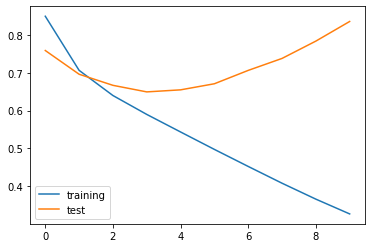

In [ ]:
import matplotlib.pyplot as plt

plt.plot(list_training_loss, label='training')
plt.plot(list_test_loss, label='test')
plt.legend()
plt.show()